In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import find_peaks
from scipy.signal import peak_widths
%matplotlib inline

In [98]:
filepath =  "C:/Zhang Lab/code"
name = "test.txt"
#filepath = "C:/Zhang Lab/Data/ECA/2021.01.18-N2H4 ECA collision - 30 nm PtNP/Data_analysis"
#name = "T4_Test_1.txt"
filename = filepath + "/" + name;
WindowSize = 200

In [99]:
df = pd.read_csv(filename, header = None,sep = ',', names=["time", "current", "filter"]);
df = df.drop(df.index[[np.arange(WindowSize)]], axis=0)
df.head()

,time,current,filter
200,44.17353,2135.01,2135.1320
201,44.17354,2133.79,2135.2235
202,44.17355,2134.40,2135.3150
203,44.17356,2134.40,2135.4065
204,44.17357,2133.79,2135.4370


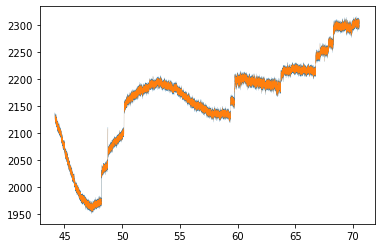

In [100]:
plt.plot(df["time"], df["current"], linewidth = 0.1)
plt.plot(df["time"], df["filter"], linewidth = 0.1)

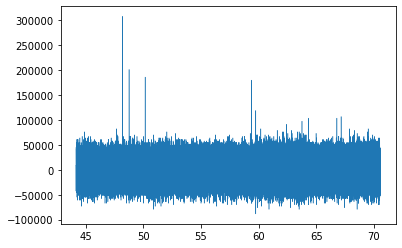

In [101]:
y_derivative = np.diff(df["filter"])
x_derivative = np.diff(df["time"])
derivative = y_derivative/x_derivative
plt.plot(df["time"].drop([WindowSize]), derivative, linewidth = 0.5)

In [102]:
peaks = find_peaks(derivative, height=100000, width=10)
# obtaining/adjusting coordinate axes (dt = 0.01 ms)
min_x_ind = np.min(df["time"])/0.00001
xcoords = (peaks[0] + min_x_ind) * 0.00001
ycoords = peaks[1]['peak_heights']
peak_indices = peaks[0]

In [103]:
peaks

(array([ 403687,  459667,  459704,  599009,  599011, 1521927, 1557505,
        2012742, 2260411, 2297170], dtype=int64),
 {'peak_heights': array([308200.00012115, 201400.00007919, 186200.00007321, 186150.00007318,
         186150.00007318, 180050.00007077, 119050.00004682, 103749.99996706,
         103750.0001145 , 106849.99996607]),
  'prominences': array([381400.00014997, 268550.00010558, 235050.00009241, 253300.00005186,
         253300.00005186, 259400.00010198, 186200.00007321, 173949.9999448 ,
         173950.00009224, 186200.00005367]),
  'left_bases': array([  47729,  436822,  459684,  459724,  459724,  673309, 1523156,
         1557552, 1557552, 1557552], dtype=int64),
  'right_bases': array([1557552, 1557552, 1557552, 1557552, 1557552, 1557552, 1557552,
         2082200, 2275984, 2435711], dtype=int64),
  'widths': array([24.84601873, 22.71026372, 18.88235294, 25.62816995, 25.62816995,
         28.12868852, 33.        , 24.04619565, 37.25819669, 24.58106649]),
  'width_height

Text(0.5, 0, 'Time(s)')

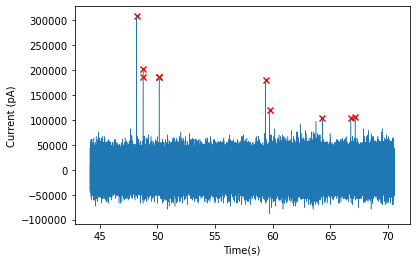

In [104]:
plt.plot(df["time"].drop([WindowSize]),derivative, linewidth = 0.5)
# Adding points to graph
plt.scatter(xcoords,ycoords, c = 'red', marker="x")
# Labeling axes
plt.ylabel('Current (pA)')
plt.xlabel('Time(s)')

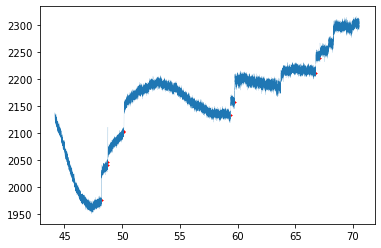

In [105]:
plt.plot(df["time"],df["current"], linewidth = 0.1)
#plt.plot(df["time"],df["filter"], linewidth = 0.1)
plt.scatter(xcoords,df["current"][peak_indices], c = 'red', marker="x", s = 1)

In [106]:
a = [1,2,3,4,5,6,7,8,9]
j  = 0
step = 3 #length step
for i in range(0, len(a), step):
    print(i)
    b = [a[i:i+step]]
    j = j + 1


0
3
6
